# Введение в Keras

# Начало работы с Keras

В этом блокноте будет представлен начальный обзор использования пакета Keras для определения, обучения и оценки моделей глубокого обучения с Keras. К концу этого урока вы сможете работать с многослойными нейронными сетями базовой архитектуры прямой связи. Сети прямой связи являются одним из класса базовых моделей, называемых **последовательными моделями**, которые легко создать с помощью Keras.

И здесь мы сосредоточимся на том, чтобы освоиться с использованием пакета Keras, чтобы подготовиться к остальным занятиям этого раздела курса.

****
**Примечание:** Этот ноутбук был создан с использованием Anaconda 3 с Python 3.7. и предполагается, что был установлен стандартный стек Anaconda.
****

### 1.1 Архитектура Keras

Keras - это оболочка для других фреймворков глубокого обучения. Keras предоставляет согласованные и упрощенные API для использования этих фреймворков.

В настоящее время Keras поддерживает TensorFlow, CNTK и Theano. И мы будем использовать Keras в качестве оболочки TensorFlow.

Если вы еще не установили Keras и TensorFlow, следуйте [инструкциям по установке с сайта Keras] (https://keras.io/#installation).

### 1.2 Обзор документации Keras

Одной из многих приятных особенностей Keras является полная и полезная документация. Полную документацию, включая инструкции по установке, можно найти на [веб-сайте Keras] (https://keras.io/#keras-the-python-deep-learning-library). Когда вы научитесь работать с Keras, вы можете обратиться к документации и примерам на этом сайте.

В книге [Deep Learning with Python] (https://www.manning.com/books/deep-learning-with-python) Франсуа Шоле, создателя Keras, приведены подробные примеры и обсуждение широкого круга вопросов глубокого обучения.

## 2.0 Первый пример Keras с прямой связью

Давайте сразу попробуем пример. Мы создадим простую нейронную сеть с прямой связью для классификации рукописных цифр из известного набора данных MNIST. MNIST содержит 60000 маркированных обучающих изображений и 10000 тестовых изображений. Многие люди рассматривают набор данных MNIST как пример глубокого обучения «Привет мир».

### 2.1 Загрузка набора данных MNIST

MNIST также встроен в пакет `keras.datasets`. Нам нужно только импортировать этот пакет, а затем загрузить его.

Первым шагом является импорт пакетов, которые нам понадобятся для остальной части этого ноутбука. Выполните код в ячейке ниже, чтобы загрузить эти пакеты. Этот код должен выполняться без ошибок или предупреждений, если все установлено правильно.

In [1]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
from keras.utils import plot_model
%matplotlib inline

Using TensorFlow backend.


Обратите внимание, что серверная часть TensorFlow была загружена вместе с различными пакетами Keras. Керас обращается в TensorFlow для выполнения вычислений.

Теперь загрузите обучающие и тестовые изображения и соответствующие метки, выполнив код в ячейке ниже. Метод load_data создает два кортежа изображений и меток для моделей обучения и тестирования.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Изображения рукописных цифр представлены в виде прямоугольных массивов размером $28x28$. Вы можете увидеть это, выполнив код в ячейке ниже.

In [3]:
print(train_images[4].shape)

(28, 28)


Все рукописные изображения выполнены в оттенках серого, поэтому не имеют цветового измерения.

Код в ячейке ниже отображает 4 из 60000 изображений рукописных цифр вместе с их метками. Выполните этот код и проверьте результаты.

Label = 2


Label = 4


Label = 6


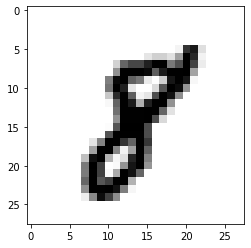

Label = 8


In [4]:
for i in range(5, 20, 4):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

### 2.2 Подготовить данные для обучения.

Как и в случае со всеми задачами машинного обучения, подготовка данных является важным шагом. Без тщательной подготовки данных даже лучшие модели будут давать плохие результаты или даже не будут выполнены.

Изображения MNIST сохраняются в виде трехмерного тензора. Каждый тензор изображения имеет размеры $6000\ x\ 28\ x\ 28$. Однако для обучения нейронной сети на этих изображениях мы должны выровнять это представление так, чтобы каждое изображение представляло собой вектор длиной $28 * 28$. Результатом будет двумерный тензор с размерами $60000\ x\ (28*28)$.

Кроме того, модели, созданные с помощью Keras и большинства других систем глубокого обучения, работают с числами с плавающей запятой. Значения пикселей в градациях серого изображения кодируются как целые числа в диапазоне $\{ 0, 255 \}$. Эти значения пикселей должны быть приведены к числам с плавающей точкой, а затем стандартизированы, чтобы быть в диапазоне $\{ 0.0, 1.0 \}$. Как и в случае обучения многих моделей машинного обучения, лучше всего использовать стандартизированные значения для обучения глубоких нейронных сетей.

Код в ячейке ниже выравнивает изображения и преобразует значения пикселей в стандартизированное число с плавающей запятой. Выполните этот код.

In [5]:
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


Обратите внимание на исходную форму и результирующую форму тензора тренировочного образа. Кроме того, массив теперь имеет тип `float32`.

Выполните код в ячейке ниже, чтобы применить такое же преобразование к тестовым изображениям.

In [6]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 28, 28) (10000,)
(10000, 784)


Поскольку мы работаем над проблемой классификации, значения меток должны быть категориального типа. Выполните код в ячейке ниже и проверьте кодировку этих меток.

In [7]:
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


Метки кодируются как целые числа, соответствующие цифре на изображении. Эти значения должны быть приведены к категориальному типу. Для Keras категориальные типы должны иметь **одно горячее кодирование**. Одно горячее кодирование - это набор двоичных столбцов, по одному для каждой категории.

К счастью, метод `to_categorical` в пакете` keras.utils.np_utils` делает именно это. Выполните код в ячейке ниже и проверьте напечатанные результаты.

In [8]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Обратите внимание, что значения меток были преобразованы из целых чисел в набор из **10 фиктивных переменных** одной горячей кодировки. Столбцы фиктивных переменных представляют цифры в диапазоне $\{ 0,9 \}$. Одна фиктивная переменная для каждого случая будет кодироваться как $1$, а остальные - как $0$. Например, первая строка в приведенном выше примере кодирует $2$, а вторая строка кодирует $1$.

Выполните код в ячейке ниже, чтобы привести метки теста к фиктивным переменным.

In [9]:
test_labels = ku.to_categorical(test_labels)

### 2.3 Определение последовательной модели

Данные подготовлены, поэтому пришло время приступить к определению нейросетевой модели. Мы используем простую модель прямой связи, которая является одним из типов последовательной модели, которую может создать Keras. Существует общий рецепт для определения последовательных моделей Keras:

1. Определите объект последовательной модели.
2. Определите один или несколько скрытых слоев.
3. Определите выходной слой.

Вы найдете [краткое руководство по последовательным моделям Keras] (https://keras.io/getting-started/sequential-model-guide/) в документации Keras

Конкретно в этом случае последовательная модель определяется следующим образом:
1. Объект последовательной модели `nn` определен.
2. Определен один скрытый слой.
  - Этот слой плотный (полностью связанный) с 512 единицами.
  - Активация каждого блока прямолинейна.
  - Скрытый слой ожидает входной тензор $28 * 28$ по неопределенному количеству случаев (изображений).
3. Выходной слой имеет 10 скрытых единиц.
  - Нам нужно 10 единиц, поскольку мы классифицируем 10 категорий рукописных цифр.
  - Это полиномиальная задача классификации **Multinomial**, поэтому мы используем активацию softmax.
  
Выполните этот код, чтобы определить модель.

In [10]:
#conda install graphviz
#conda install pydot
nn = models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nn.add(layers.Dense(10, activation = 'softmax'))
plot_model(nn, to_file='model.png', show_shapes=True)

### 2.4 Обучение и оценка последовательной модели

С определенной моделью пришло время обучать и оценивать ее. Во-первых, модель должна быть скомпилирована путем выполнения кода ниже. Этот вызов определяет следующее:

1. Укажите оптимизатор.
2. Укажите функцию потерь. В этом случае мы выполняем полиномиальную классификацию, поэтому мы используем `categoryorical_crossentropy`.
3. Укажите один или несколько показателей, используемых для оценки производительности модели. В этом случае мы используем только одну метрику, точность.

Мы обсудим технические детали модели позже.

In [11]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Теперь модель готова к обучению с использованием метода `fit`, выполнив код в ячейке ниже. Метод `fit` имеет несколько аргументов:

1. Обучающие данные.
2. Обучающие метки.
3. Количество эпох (итераций), в течение которых обучается модель.
4. Размер партии, используемый для оптимизатора. Смысл этого будет обсуждаться в уроке по оптимизации.

In [28]:
nr.seed(9898)
set_random_seed(9777)
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2545 - accuracy: 0.9261
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1034 - accuracy: 0.9695
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0687 - accuracy: 0.9799
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.0499 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0374 - accuracy: 0.9887


Обратите внимание, что потеря уменьшается и точность увеличивается с каждой тренировочной эпохой. Однако, поскольку нейронные сети, как правило, переизбыточны, эти улучшенные показатели могут указывать или не указывать на то, что модель на самом деле становится лучше. Имейте в виду, что модель может просто изучать данные обучения.

Необходимо протестировать модель на независимом наборе данных. Метод «оценки» позволяет вам сделать это. Выполните код в ячейке ниже и сравните результаты с результатами обучения.

In [29]:
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/step


[0.06728626329711405, 0.9807000160217285]

Похоже, что модель является переподогнанной, так как ошибка и точность немного хуже, чем наблюдаемые при обучении.

## 3.0 Тренировка по эпохам

Чтобы определить, в какой момент модель становится переподогнанной во время тренировки, необходимо оценивать модель после каждой тренировочной эпохи. Создается объект `history`, который содержит историю различных показателей в процессе обучения или подгонки.

Обратите внимание, что должен быть указан аргумент `validation_data`, чтобы производительность модели можно было вычислять в конце или в каждой эпохе. И история тренинга будет включать в себя ошибку валидации и точность валидации для каждой эпохи.

Ожидайте, что выполнение этого кода займет некоторое время.

In [30]:
## Define a sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model. 
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
 
## Fit the model saving the results to a history file    
nr.seed(4678)
set_random_seed(8866)
history = nnt.fit(train_images, train_labels, 
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2598 - accuracy: 0.9244 - val_loss: 0.1307 - val_accuracy: 0.9598
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1033 - accuracy: 0.9698 - val_loss: 0.1040 - val_accuracy: 0.9685
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 0.0831 - val_accuracy: 0.9734
Epoch 4/10
60000/60

Чтобы понять эти цифры, можно составить несколько графиков, сравнивающих результаты обучения и оценки по мере прохождения эпох обучения. Код в следующих двух ячейках делает это несколько примитивно. Массив Numpy редактируется вручную, чтобы включить ошибки при обучении и точность обучения.

Функции `plot_loss` и `plot_accuracy` в следующих двух ячейках отображают тренировочную ошибку и точность синим цветом, а тестовую ошибку и точность - красным. Выполните код и изучите графики.

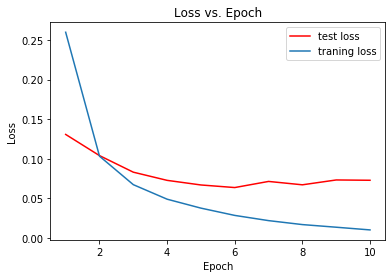

In [33]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)  

In [38]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)    

Обратите внимание, что ошибка и точность обучения продолжают улучшаться в течение эпох. Однако ошибка и точность значительно улучшаются только в первые четыре, или, возможно, 5 эпохи. Это явное свидетельство того, что последующие эпохи просто переобучают модель.

## 4.0 Добавление скрытых слоев

Далее мы добавим дополнительный скрытый слой к модели. Дополнительные слои увеличивают способность модели представлять сложную функцию. Однако сеть становится более восприимчивой к переоценке.

Код в ячейке ниже определяет модель, аналогичную первой, но со вторым уровнем. Обратите внимание, что определение двухслойной модели почти такое же, как и для однослойной модели. В этом случае второй уровень имеет то же количество единиц и функцию активации, что и первый.

Тем не менее, обратите внимание, что `input_shape` не нужно определять для скрытых слоев после первого. Керас сам будет определять размерность тензоров в слоях.

Ожидайте, что выполнение этого кода займет некоторое время.

In [39]:
## Define a sequential model
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(512, activation = 'relu'))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
    
## Fit the model, saving the results to a history file.     
nr.seed(2432)
set_random_seed(5544)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2189 - accuracy: 0.9323 - val_loss: 0.1084 - val_accuracy: 0.9653
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0820 - accuracy: 0.9751 - val_loss: 0.0976 - val_accuracy: 0.9672
Epoch 3/20
60000/60000 [==========

Как и прежде, мы можем лучше понять эти результаты, создав графики ошибки и точности для обучения и теста по эпохам. Выполните код в двух ячейках ниже, чтобы отобразить эти графики и изучить результаты.

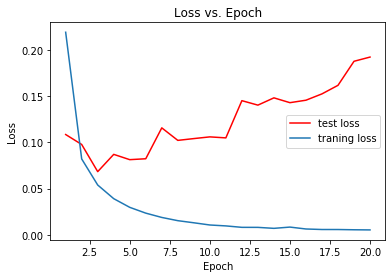

In [40]:
plot_loss(history)  

In [41]:
plot_accuracy(history)    

Обратите внимание, что после четвертой эпохи тестовая ошибка фактически увеличивается, тогда как тренировочная ошибка продолжает уменьшаться. Это явный признак переподгонки.

По сравнению с примером с одним слоем переподгонка более очевидна. Это не должно быть сюрпризом, поскольку количество весов почти удвоилось по сравнению с однослойной моделью.

## 5.0 Добавление регуляризации в модель

Регуляризация используется для предотвращения чрезмерной подгонки моделей машинного обучения, включая нейронные сети. Пакет регуляризаций Keras предоставляет методы регуляризации L1 и L2. Теория регуляризации будет рассмотрена позже. Кроме того, вы можете найти [документацию по пакету регуляризаторов Keras] (https://keras.io/regularizers/).

Код в ячейке ниже добавляет аргумент `kernel_regularizer` со значением `regularizers.l2(0.01)`. Это добавляет вес затухания 0,01 к весам модели.

Выполните код. Ожидайте, что выполнение займет некоторое время.

In [42]:
## Difine the layers of the sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                        kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Define an optimzer object and compile the model
optimizer = rmsprop()
nnt.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
## Fit the compiled model    
nr.seed(8765)
set_random_seed(7654)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.6441 - accuracy: 0.9213 - val_loss: 0.2948 - val_accuracy: 0.9650
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2678 - accuracy: 0.9603 - val_loss: 0.2108 - val_accuracy: 0.9698
Epoch 3/20
60000/60000 [==========

Еще раз, мы можем лучше всего понять эти результаты, создавая графики ошибки и точности для обучения и теста по эпохам. Выполните код в двух ячейках ниже, чтобы отобразить эти графики и изучить результаты.

In [43]:
plot_loss(history)  

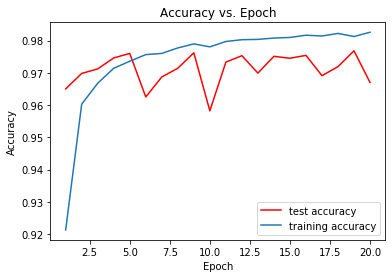

In [44]:
plot_accuracy(history)    

Сравните эти результаты с предыдущей нерегулярной моделью.